#### Load Package

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg


import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [91]:
df = pd.read_csv(r'C:\Users\Sree\Downloads\MSFT.csv')
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,233.759995,234.919998,231.149994,232.130005,229.908890,28357300
1,2022-11-01,234.600006,235.740005,227.330002,228.169998,225.986771,30592300
2,2022-11-02,229.460007,231.300003,220.039993,220.100006,217.994003,38407000


In [92]:
new_df = df[['Date','Close']]
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.set_index('Date',inplace = True)
new_df.head()

,Close
Date,
2022-10-31,232.130005
2022-11-01,228.169998
2022-11-02,220.100006
2022-11-03,214.250000
2022-11-04,221.389999


#### Stationary checking

In [93]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
    
    report = adfuller(data)
    label = ['ADF STATISTIC','P-VALUE','LAG USED','OBSERVATION']
    
    for value,label in zip(report,label):
        print(label+ ' : ' +str(value))
        
    if report[1]>0.05:
        print('The Data is non-stationary')
    
    else:
        print('The data is stationary')

adf_test(new_df)

ADF STATISTIC : -1.4175043033962096
P-VALUE : 0.5738561643647346
LAG USED : 2
OBSERVATION : 248
The Data is non-stationary


#### Make it as stationary data


In [94]:
# take a differance and make it as stationary
neww_df = new_df.diff().dropna()
adf_test(neww_df)

ADF STATISTIC : -13.778614278145342
P-VALUE : 9.387553092055889e-26
LAG USED : 1
OBSERVATION : 248
The data is stationary


#### Model Creation

In [95]:
lag = 3
model = AutoReg(neww_df,lags=lag)
result = model.fit()

#### Predict the future values

In [98]:
forecast_steps = 6
prediction = result.predict(start = len(neww_df),end = len(neww_df) + forecast_steps -1)
# Example for differencing
#prediction = prediction.cumsum()
# Example for log transformation
#original_data = np.exp(log_transformed_data)

#### Plot the predicted data

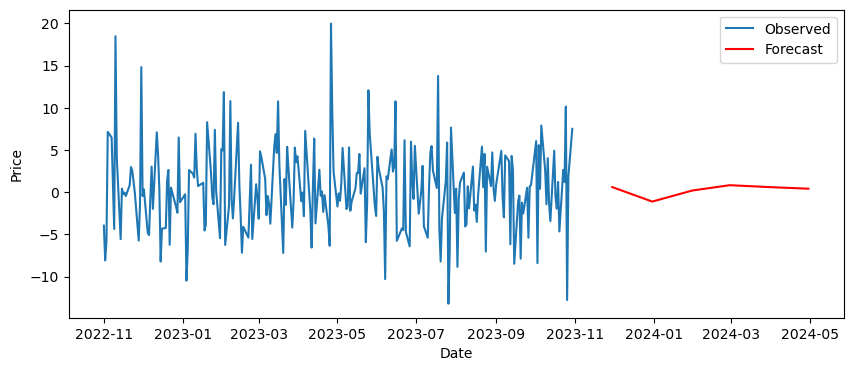

In [102]:
# Plot the original data and forecast
plt.figure(figsize=(10,4))
plt.plot(neww_df.index, neww_df, label='Observed')
plt.plot(pd.date_range(start=neww_df.index[-1], periods=forecast_steps+1,freq = 'M')[1:], prediction, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()